<a href="https://colab.research.google.com/github/razorzero0/fuzzy-logic-sugeno/blob/main/Fuzzy_Logic_Sugeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results of Fuzzy Inference System using Sugeno Method:
Input Data:
Permintaan : 4000
Persediaan : 300
1. Fuzzification:


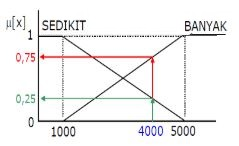

  μ Permintaan Sedikit[4000] = (5000 - 4000) / (5000 - 1000) =  0.25
  μ Permintaan Banyak[4000] = (4000 - 1000) / (5000 - 1000) =  0.75


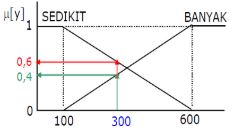

  μ Persediaan Sedikit[300] = (600 - 300) / (600 - 100) =  0.6
  μ Persediaan Banyak[300] = (300 - 100) / (600 - 100) =  0.4
2. Fuzzy Logic Operations (Inference and Composition):
[R1] Rule1 (α_predikat1) = MIN(0.25, 0.4) 0.25
[R2] Rule2 (α_predikat2) = MIN(0.25, 0.6) 0.25
[R3] Rule3 (α_predikat3) = MIN(0.75, 0.4) 0.4
[R4] Rule4 (α_predikat4) = MIN(0.75, 0.6) 0.6
3. Implication:
[R1] Z1 = 4000 - 300 =  3700
[R2] Z2 = 4000 =  4000
[R3] Z3 = 4000 =  4000
[R4] Z4 = 1.25 * (4000 - 300) =  4625.0
4. Defuzzification:
Z = ((α_predikat1 * z1) + (α_predikat2 * z2) + (α_predikat3 * z3) + (α_predikat4 * z4)) / (α_predikat1 + α_predikat2 + α_predikat3 + α_predikat4)
Z = ((0.25 * 3700) + (0.25 * 4000) + (0.4 * 4000) + (0.6 * 4625.0)) / (0.25 + 0.25 + 0.4 + 0.6)
   Z = 4200.0


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Membership Linear Function
# Memiliki respons terhadap seberapa besar input masuk dalam suatu himpunan fuzzy tertentu.

def demand_high(min_demand, max_demand, demand):
    # Membership function untuk tingkat permintaan tinggi
    return (demand - min_demand) / (max_demand - min_demand)

def demand_low(min_demand, max_demand, demand):
    # Membership function untuk tingkat permintaan rendah
    return (max_demand - demand) / (max_demand - min_demand)

def supply_high(min_supply, max_supply, supply):
    # Membership function untuk tingkat persediaan tinggi
    return (supply - min_supply) / (max_supply - min_supply)

def supply_low(min_supply, max_supply, supply):
    # Membership function untuk tingkat persediaan rendah
    return (max_supply - supply) / (max_supply - min_supply)

def rule1(min_demand, max_demand, demand, min_supply, max_supply, supply):
    return min(demand_low(min_demand, max_demand, demand), supply_high(min_supply, max_supply, supply))

def rule2(min_demand, max_demand, demand, min_supply, max_supply, supply):
    return min(demand_low(min_demand, max_demand, demand), supply_low(min_supply, max_supply, supply))

def rule3(min_demand, max_demand, demand, min_supply, max_supply, supply):
    return min(demand_high(min_demand, max_demand, demand), supply_high(min_supply, max_supply, supply))
3
def rule4(min_demand, max_demand, demand, min_supply, max_supply, supply):
    return min(demand_high(min_demand, max_demand, demand), supply_low(min_supply, max_supply, supply))

def z1(demand, supply):
    return demand - supply

def z2(demand):
    return demand

def z3(demand):
    return demand

def z4(demand, supply):
    return 1.25 * (demand - supply)

def defuzzify(min_demand, max_demand, demand, min_supply, max_supply, supply):
    return (
        (rule1(min_demand, max_demand, demand, min_supply, max_supply, supply) * z1(demand, supply)) +
        (rule2(min_demand, max_demand, demand, min_supply, max_supply, supply) * z2(demand)) +
        (rule3(min_demand, max_demand, demand, min_supply, max_supply, supply) * z3(demand)) +
        (rule4(min_demand, max_demand, demand, min_supply, max_supply, supply) * z4(demand, supply))
    ) / (
        rule1(min_demand, max_demand, demand, min_supply, max_supply, supply) +
        rule2(min_demand, max_demand, demand, min_supply, max_supply, supply) +
        rule3(min_demand, max_demand, demand, min_supply, max_supply, supply) +
        rule4(min_demand, max_demand, demand, min_supply, max_supply, supply)
    )

# Input data
# demand = int(input("Enter the demand quantity: "))
# supply = int(input("Enter the supply quantity: "))
demand = 4000;
supply = 300;

# Variable initialization
min_demand = 1000
max_demand = 5000
min_supply = 100
max_supply = 600


# Displaying results
print("Results of Fuzzy Inference System using Sugeno Method:")
# print(f'Permintaan : [{min_demand};{max_demand}]')
# print(f'Persediaan : [{min_supply};{max_supply}]')
print('Input Data:')
print(f'Permintaan : {demand}')
print(f'Persediaan : {supply}')
print('='*80)
print("1. Fuzzification:")
img = cv2.imread( "/content/kurva-permintaan.JPG" )
cv2_imshow(img)
print(f"  μ Permintaan Sedikit[{demand}] = ({max_demand} - {demand}) / ({max_demand} - {min_demand}) = ", demand_low(min_demand, max_demand, demand))
print(f"  μ Permintaan Banyak[{demand}] = ({demand} - {min_demand}) / ({max_demand} - {min_demand}) = ", demand_high(min_demand, max_demand, demand))
img = cv2.imread( "/content/kurva-persediaan.JPG" )
cv2_imshow(img)
print(f"  μ Persediaan Sedikit[{supply}] = ({max_supply} - {supply}) / ({max_supply} - {min_supply}) = ", supply_low(min_supply, max_supply, supply))
print(f"  μ Persediaan Banyak[{supply}] = ({supply} - {min_supply}) / ({max_supply} - {min_supply}) = ", supply_high(min_supply, max_supply, supply))
print('='*80)
print("2. Fuzzy Logic Operations (Inference and Composition):")
print(f"[R1] Rule1 (α_predikat1) = MIN({demand_low(min_demand, max_demand, demand)}, {supply_high(min_supply, max_supply, supply)})", rule1(min_demand, max_demand, demand, min_supply, max_supply, supply))
print(f"[R2] Rule2 (α_predikat2) = MIN({demand_low(min_demand, max_demand, demand)}, {supply_low(min_supply, max_supply, supply)})", rule2(min_demand, max_demand, demand, min_supply, max_supply, supply))
print(f"[R3] Rule3 (α_predikat3) = MIN({demand_high(min_demand, max_demand, demand)}, {supply_high(min_supply, max_supply, supply)})", rule3(min_demand, max_demand, demand, min_supply, max_supply, supply))
print(f"[R4] Rule4 (α_predikat4) = MIN({demand_high(min_demand, max_demand, demand)}, {supply_low(min_supply, max_supply, supply)})", rule4(min_demand, max_demand, demand, min_supply, max_supply, supply))

print('='*80)
print("3. Implication:")
print(f"[R1] Z1 = {demand} - {supply} = ", z1(demand, supply))
print(f"[R2] Z2 = {demand} = ", z2(demand))
print(f"[R3] Z3 = {demand} = ", z3(demand))
print(f"[R4] Z4 = 1.25 * ({demand} - {supply}) = ", z4(demand, supply))
print('='*80)
print("4. Defuzzification:")
print(f"Z = ((α_predikat1 * z1) + (α_predikat2 * z2) + (α_predikat3 * z3) + (α_predikat4 * z4)) / (α_predikat1 + α_predikat2 + α_predikat3 + α_predikat4)")
print(f"Z = (({rule1(min_demand, max_demand, demand, min_supply, max_supply, supply)} * {z1(demand, supply)}) + "
      f"({rule2(min_demand, max_demand, demand, min_supply, max_supply, supply)} * {z2(demand)}) + "
      f"({rule3(min_demand, max_demand, demand, min_supply, max_supply, supply)} * {z3(demand)}) + "
      f"({rule4(min_demand, max_demand, demand, min_supply, max_supply, supply)} * {z4(demand, supply)})) / "
      f"({rule1(min_demand, max_demand, demand, min_supply, max_supply, supply)} + "
      f"{rule2(min_demand, max_demand, demand, min_supply, max_supply, supply)} + "
      f"{rule3(min_demand, max_demand, demand, min_supply, max_supply, supply)} + "
      f"{rule4(min_demand, max_demand, demand, min_supply, max_supply, supply)})")
print("   Z =", defuzzify(min_demand, max_demand, demand, min_supply, max_supply, supply))